# Data Exploration

## Imports

In [1]:
import pandas as pd
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline

## Import Files

In [2]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/FullDF.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")

full_df.head()

,Date,Hour,Nieuwmarkt Lat,Nieuwmarkt Lon,Nieuwezijds Kolk Lat,Nieuwezijds Kolk Lon,Dam Lat,Dam Lon,Spui Lat,Spui Lon,...,Nieuwmarkt LatScaled,Nieuwmarkt LonScaled,Nieuwezijds Kolk LatScaled,Nieuwezijds Kolk LonScaled,Dam LatScaled,Dam LonScaled,Spui LatScaled,Spui LonScaled,Centraal Station LatScaled,Centraal Station LonScaled
0,2018-03-11,2400,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,0.053591,0.075412,0.055127,0.047017,0.05401,0.03321,0.052585,0.030104,0.055554,0.073682
1,2018-03-11,2100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,0.053591,0.075412,0.055127,0.047017,0.05401,0.03321,0.052585,0.030104,0.055554,0.073682
2,2018-03-11,2100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,0.053591,0.075412,0.055127,0.047017,0.05401,0.03321,0.052585,0.030104,0.055554,0.073682
3,2018-03-11,2200,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,0.053591,0.075412,0.055127,0.047017,0.05401,0.03321,0.052585,0.030104,0.055554,0.073682
4,2018-03-11,2200,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,0.053591,0.075412,0.055127,0.047017,0.05401,0.03321,0.052585,0.030104,0.055554,0.073682


## GVB

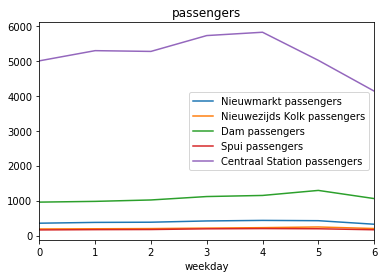

In [3]:
stations = ["Nieuwmarkt", "Nieuwezijds Kolk", "Dam", "Spui", "Centraal Station"]

for station in stations:
    full_df[station + " passengers"] = full_df[station +" score"] / full_df[station +" weight"]

df = full_df[["weekday", "Nieuwmarkt passengers", "Nieuwezijds Kolk passengers", "Dam passengers",
             "Spui passengers", "Centraal Station passengers"]].groupby(["weekday"]).agg(
            {"Nieuwmarkt passengers": "mean", 
             "Nieuwezijds Kolk passengers": "mean", 
             "Dam passengers": "mean",
             "Spui passengers": "mean", 
             "Centraal Station passengers": "mean"}).reset_index()

df.plot(x="weekday", title="passengers")
plt.savefig('../../../Data_thesis/Useful/passenger_counts.png')

D:\Programs\Anaconda\envs\Analytics\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


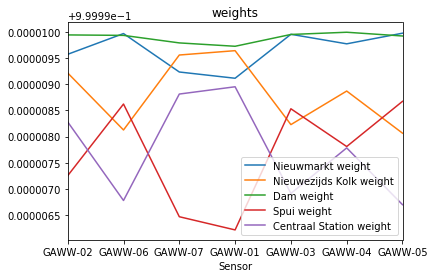

In [16]:
df = full_df[["Sensor", "Nieuwmarkt weight", "Nieuwezijds Kolk weight", "Dam weight",
             "Spui weight", "Centraal Station weight"]]
df.drop_duplicates(subset=["Sensor"], inplace=True)

df.plot(x="Sensor", title="weights")
plt.savefig('../../../Data_thesis/Useful/station_weights.png')

## CMSA 

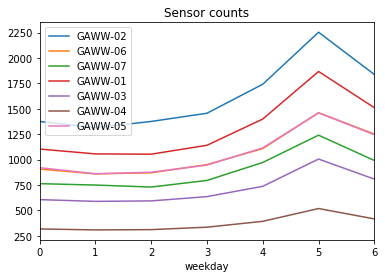

In [5]:
df_dict = {}

for sensor in full_df["Sensor"].unique():
    df = full_df[full_df["Sensor"] == sensor][["Sensor", "CrowdednessCount", 
                                                       "weekday"]].groupby(["Sensor", "weekday"]).agg(
        {"CrowdednessCount": "mean"}).reset_index()
    temp_dict = df.to_dict(orient="index")
    CrowdednessCount_list = []
    weekday_list = []
    for k,v in temp_dict.items():
        weekday_list.append(v["weekday"])
        CrowdednessCount_list.append(v["CrowdednessCount"])
    
    if "weekday" not in df_dict:
        df_dict["weekday"] = weekday_list
        
    df_dict[v["Sensor"]] = CrowdednessCount_list
    

df = pd.DataFrame.from_dict(df_dict)

df.plot(x="weekday", title="Sensor counts")
plt.savefig('../../../Data_thesis/Useful/sensor_counts.png')

## Map

In [3]:
street_map = gpd.read_file("../../../Data_thesis/MapShapeFiles/roads.shp")
crs = {"init": "epsg:4326"}

In [6]:
gvb_cor_dict = {}

gvb_dict = full_df.to_dict("index")

gvb_cor_dict["Nieuwmarkt"] = {"Latitude": gvb_dict[0]["Nieuwmarkt Lat"], "Longitude": gvb_dict[0]["Nieuwmarkt Lon"]}
gvb_cor_dict["Nieuwezijdse Kolk"] = {"Latitude": gvb_dict[0]["Nieuwezijds Kolk Lat"], 
                                         "Longitude": gvb_dict[0]["Nieuwezijds Kolk Lon"]}
gvb_cor_dict["Dam"] = {"Latitude": gvb_dict[0]["Dam Lat"], "Longitude": gvb_dict[0]["Dam Lon"]}
gvb_cor_dict["Spui"] = {"Latitude": gvb_dict[0]["Spui Lat"], "Longitude": gvb_dict[0]["Spui Lon"]}
gvb_cor_dict["Centraal Station"] = {"Latitude": gvb_dict[0]["Centraal Station Lat"], "Longitude": gvb_dict[0]["Centraal Station Lon"]}

gvb_cor_df = pd.DataFrame.from_dict(gvb_cor_dict, orient="index").reset_index()
gvb_cor_df = gvb_cor_df.rename(index=str, columns={"index": "Station"})

In [7]:
sensor_geometry = [Point(xy) for xy in zip(full_df["SensorLongitude"], full_df["SensorLatitude"])]
gvb_geometry = [Point(xy) for xy in zip(gvb_cor_df["Longitude"], gvb_cor_df["Latitude"])]

In [8]:
sensor_geo_df = gpd.GeoDataFrame(full_df, crs = crs,geometry = sensor_geometry)
sensor_geo_df = sensor_geo_df[["Sensor", "geometry"]]

gvb_geo_df = gpd.GeoDataFrame(gvb_cor_df, crs = crs,geometry = gvb_geometry)
gvb_geo_df = gvb_geo_df[["Station", "geometry"]]

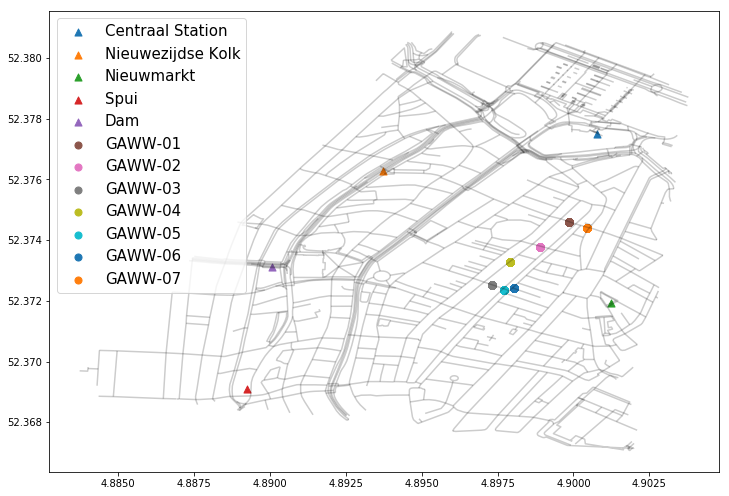

In [14]:
fig,ax = plt.subplots(figsize = (12, 12))
street_map.plot(ax = ax, alpha = 0.2, color = "black")

gvb_geo_df[gvb_geo_df["Station"] == "Centraal Station"].plot(ax = ax, markersize = 50, marker = "^", 
                                                        label = "Centraal Station")
gvb_geo_df[gvb_geo_df["Station"] == "Nieuwezijdse Kolk"].plot(ax = ax, markersize = 50, marker = "^", 
                                                        label = "Nieuwezijdse Kolk")
gvb_geo_df[gvb_geo_df["Station"] == "Nieuwmarkt"].plot(ax = ax, markersize = 50, marker = "^", 
                                                        label = "Nieuwmarkt")
gvb_geo_df[gvb_geo_df["Station"] == "Spui"].plot(ax = ax, markersize = 50, marker = "^", 
                                                        label = "Spui")
gvb_geo_df[gvb_geo_df["Station"] == "Dam"].plot(ax = ax, markersize = 50, marker = "^", 
                                                        label = "Dam")

sensor_geo_df[sensor_geo_df["Sensor"] == "GAWW-01"].plot(ax = ax, markersize = 50, marker = "o", 
                                                       label = "GAWW-01")
sensor_geo_df[sensor_geo_df["Sensor"] == "GAWW-02"].plot(ax = ax, markersize = 50, marker = "o", 
                                                       label = "GAWW-02")
sensor_geo_df[sensor_geo_df["Sensor"] == "GAWW-03"].plot(ax = ax, markersize = 50, marker = "o", 
                                                       label = "GAWW-03")
sensor_geo_df[sensor_geo_df["Sensor"] == "GAWW-04"].plot(ax = ax, markersize = 50, marker = "o", 
                                                       label = "GAWW-04")
sensor_geo_df[sensor_geo_df["Sensor"] == "GAWW-05"].plot(ax = ax, markersize = 50, marker = "o", 
                                                       label = "GAWW-05")
sensor_geo_df[sensor_geo_df["Sensor"] == "GAWW-06"].plot(ax = ax, markersize = 50, marker = "o", 
                                                       label = "GAWW-06")
sensor_geo_df[sensor_geo_df["Sensor"] == "GAWW-07"].plot(ax = ax, markersize = 50, marker = "o", 
                                                       label = "GAWW-07")

plt.legend(prop={"size": 15})
plt.savefig('../../../Data_thesis/Useful/map.png')